<p style="font-family: Times New Roman;font-size:22px;color:navy"><b>1. Introduction</b></p>

<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.1. Import libraries</b></p>

In [1]:
# For network analysis
import networkx as nx

# For plotting graphs
import matplotlib
import matplotlib.pyplot as plt

# For importing files, handling dataframes and functions
import pandas as pd
import numpy as np
import random

# Conda environment management (Import sna.yml)
# conda env create -f sna.yml
# conda activate sna

<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.2. Load and inspect nodes and edges files</b></p>

In [2]:
# Load the node file into a pandas DataFrame
nodes_df = pd.read_csv("nodes_cluster_G.csv", delimiter=';', header=0)
print(nodes_df.head())
print('===='*10)

# Load the edge file into a pandas DataFrame
edges_df = pd.read_csv('edges_cluster_G.csv', delimiter=';', header=0)
print(edges_df.head())

      id  coord  core  gender
0  12948      0     0       0
1   8295      0     1       0
2  12924      0     0       1
3  12925      0     1       0
4   7440      1     1       0
   source  target  pre_link  post_link
0   69531    2682         1          0
1   12948    2682         1          0
2    7440    2682         1          0
3   54391    2682         1          0
4   12937    2682         1          0


In [3]:
#Data type of the attributes
print(nodes_df.dtypes)
print('=='*10)
print(edges_df.dtypes)

id        int64
coord     int64
core      int64
gender    int64
dtype: object
source       int64
target       int64
pre_link     int64
post_link    int64
dtype: object


<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.3. Creat the graph</b></p>

In [4]:
#Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
for _, row in nodes_df.iterrows():
    G.add_node(row['id'], coord=row['coord'], core=row['core'], gender=row['gender'])

# Add edges to the graph
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], pre_link=row['pre_link'], post_link=row['post_link'])

# Print graph summary
print('Graph with', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges.')

Graph with 381 nodes and 2098 edges.


<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.4. Basic graph information with NetworkX</b></p>

In [5]:
# Check if the graph is connected or disconnected
print("Is the graph connected?", nx.is_connected(G))

# Checking if the graph is directed or undirected
print("Is the graph directed?", nx.is_directed(G))

# Get the density of the graph
density = nx.density(G)
print("Graph density:", density)

Is the graph connected? False
Is the graph directed? False
Graph density: 0.028981903577842243


<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.5. Plot the degree distribution</b></p>

<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>1.5.1. Degree distribution (normal scale)</b></p>

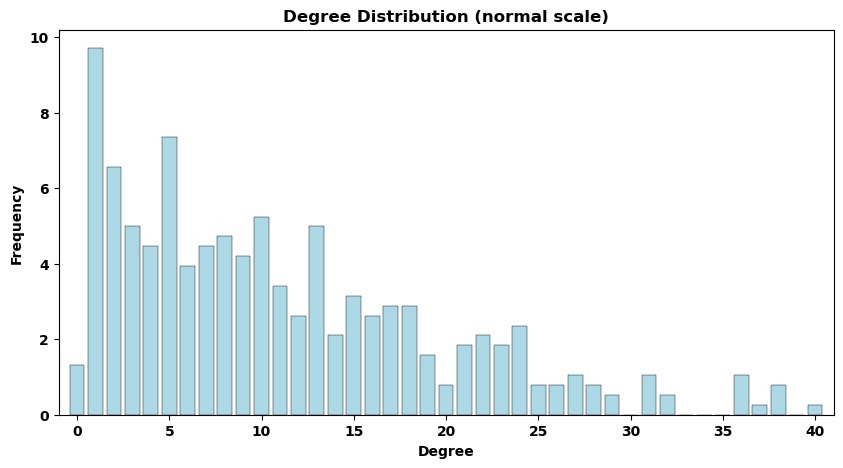

In [6]:
from matplotlib.ticker import StrMethodFormatter
from scipy import stats

#Normal scale
# Get the degree distribution using degree_histogram
degree_frequency= nx.degree_histogram(G)
n=G.number_of_nodes()
degree_frequency = [d/n*100 for d in degree_frequency]
degree=[a for a in range(0,len(degree_frequency))]
hist_data = (degree, degree_frequency)

# Plot the figure (combo bar-line)
fig, ax = plt.subplots(figsize=(10, 5))
#color='white' for visualising just one plot
ax.bar(*hist_data, color='lightblue', edgecolor='black', linewidth=0.3)
#ax.plot(*hist_data, color='red')

# Add the frequency text to each bar, using 2 decimal places
# Also test the number of degrees 
#for i, freq in enumerate(degree_frequency):
    #ax.text(i, freq, f'{freq:.2f}', ha='center', va='bottom')

ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
ax.set_title('Degree Distribution (normal scale)')

plt.xlim(-1, 41) #<40 degrees>
plt.show()

#plt.savefig('figures/degree_distribution_norm.png', format='png')

<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>1.5.2. Degree distribution (log-log scale)</b></p>

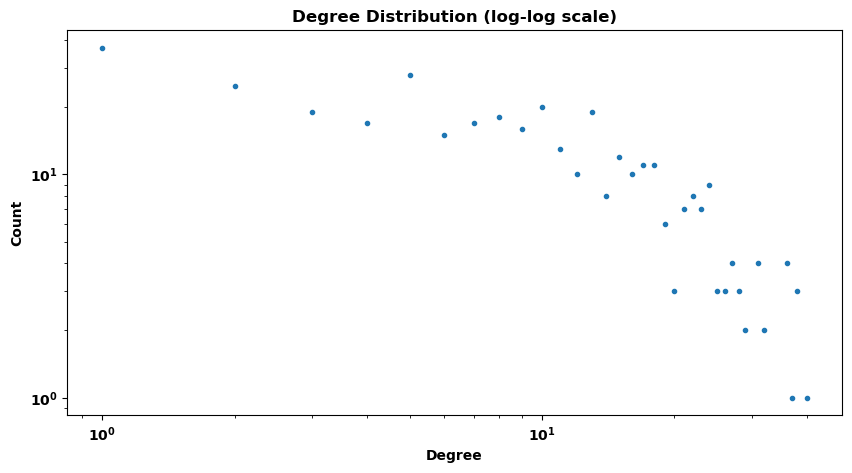

In [13]:
# Run 2 times to prevent fond.family Warning
# Log-log scale
# Compute the degree distribution
degree_seq = sorted([d for n, d in G.degree()], reverse=True)
degree_count = np.zeros(degree_seq[0] + 1, dtype=int)
for d in degree_seq:
    degree_count[d] += 1

# Plot the degree distribution on a log-log scale
plt.figure(figsize=(10, 5))
plt.loglog(range(len(degree_count)), degree_count, 'o', markersize=3)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (log-log scale)')
plt.show()

#plt.savefig('figures/degree_distribution_log.png', format='png')

<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>1.5.3. Comparison with random exponential distribution</b></p>

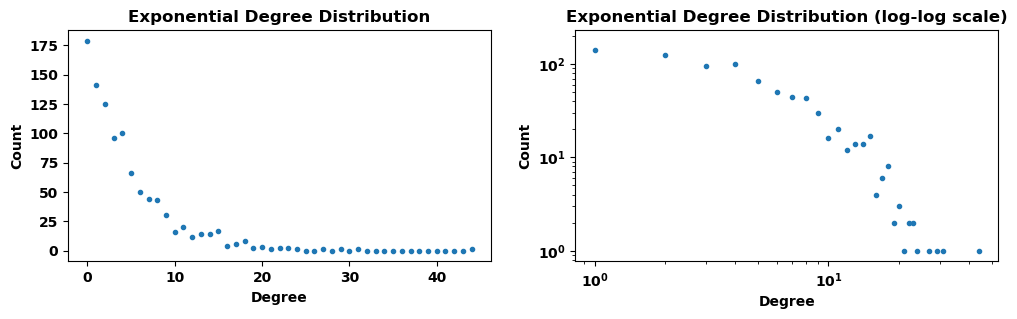

In [8]:
# Generate a random exponential degree distribution for comparison
degrees_exp = np.random.exponential(scale=5, size=1000)

# Compute the degree count
degree_count_exp = np.zeros(int(np.max(degrees_exp))+1, dtype=int)
for d in degrees_exp:
    degree_count_exp[int(d)] += 1

# Plot the exponential degree distribution
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
axs[0].plot(range(len(degree_count_exp)), degree_count_exp, 'o', markersize=3)
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Count')
axs[0].set_title('Exponential Degree Distribution')

# Plot the exponential degree distribution on a log-log scale
axs[1].loglog(range(len(degree_count_exp)), degree_count_exp, 'o', markersize=3)
axs[1].set_xlabel('Degree')
axs[1].set_ylabel('Count')
axs[1].set_title('Exponential Degree Distribution (log-log scale)')

# Show the plot
plt.show()

#plt.savefig('figures/exponential_degree_distribution.png', format='png')

<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.6. Distribution of Clustering Coefficient</b></p>

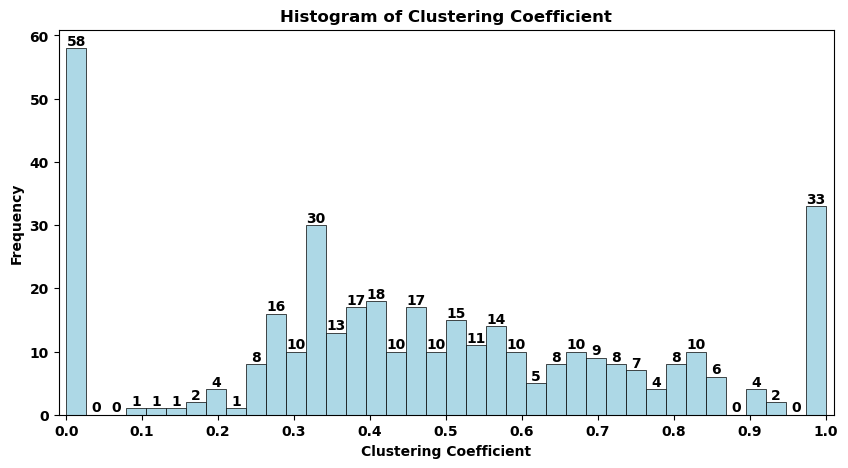

In [9]:
# Calculate the clustering coefficient for each node
cc = nx.clustering(G)

fig = plt.figure(figsize=(10, 5))

# G.number_of_nodes()=381, bins=38
# create a histogram of the clustering coefficients
n, bins, patches = plt.hist(list(cc.values()), bins=38, color='lightblue', edgecolor='black', linewidth=0.5)

# add value of each column of the histogram
for i in range(len(patches)):
    plt.annotate(str(int(n[i])),
                 xy=(patches[i].get_x()+patches[i].get_width()/2,
                                     patches[i].get_height()), ha='center', va='bottom')
# add labels and title
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Clustering Coefficient')

# set the x-axis limits and ticks
plt.xlim(-0.01, 1.01)
plt.xticks([i/10 for i in range(11)], [i/10 for i in range(11)])

plt.show()

#plt.savefig('figures/clustering_coefficient.png', format='png')

<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.7. Connected components subgraph</b></p>

<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>1.7.1. Create the subgraph</b></p>

In [15]:
# Get the list of connected components in the graph
connected_components = list(nx.connected_components(G))

# Count the number of connected components
#len(list(nx.connected_components(G)))
print("Number of connected components:", nx.number_connected_components(G))

# Get the list of isolated nodes
isolated_nodes = list(nx.isolates(G))

# Count the number of isolated nodes
print("Number of isolated nodes:", len(isolated_nodes))

# Create a new graph with only the largest connected components
largest_cc = max(connected_components, key=len)
J = G.subgraph(largest_cc).copy()

# Differences between graphs
number_nodes_diff = G.number_of_nodes() - J.number_of_nodes()
number_edges_diff = G.number_of_edges() - J.number_of_edges()

# Print graph summary
print('Graph with', J.number_of_nodes(), 'nodes and', J.number_of_edges(), 'edges.')
# Check if the graph is connected
print("Is the graph connected?", nx.is_connected(J))
# Differences between graphs
print('Largest connected components graph has a difference of',number_nodes_diff,'nodes and', number_edges_diff, 'edges.')

Number of connected components: 9
Number of isolated nodes: 5
Graph with 370 nodes and 2095 edges.
Is the graph connected? True
Largest connected components graph has a difference of 11 nodes and 3 edges.
Number of connected components: 1


<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.7.2. Visualize the subgraph</b></p>

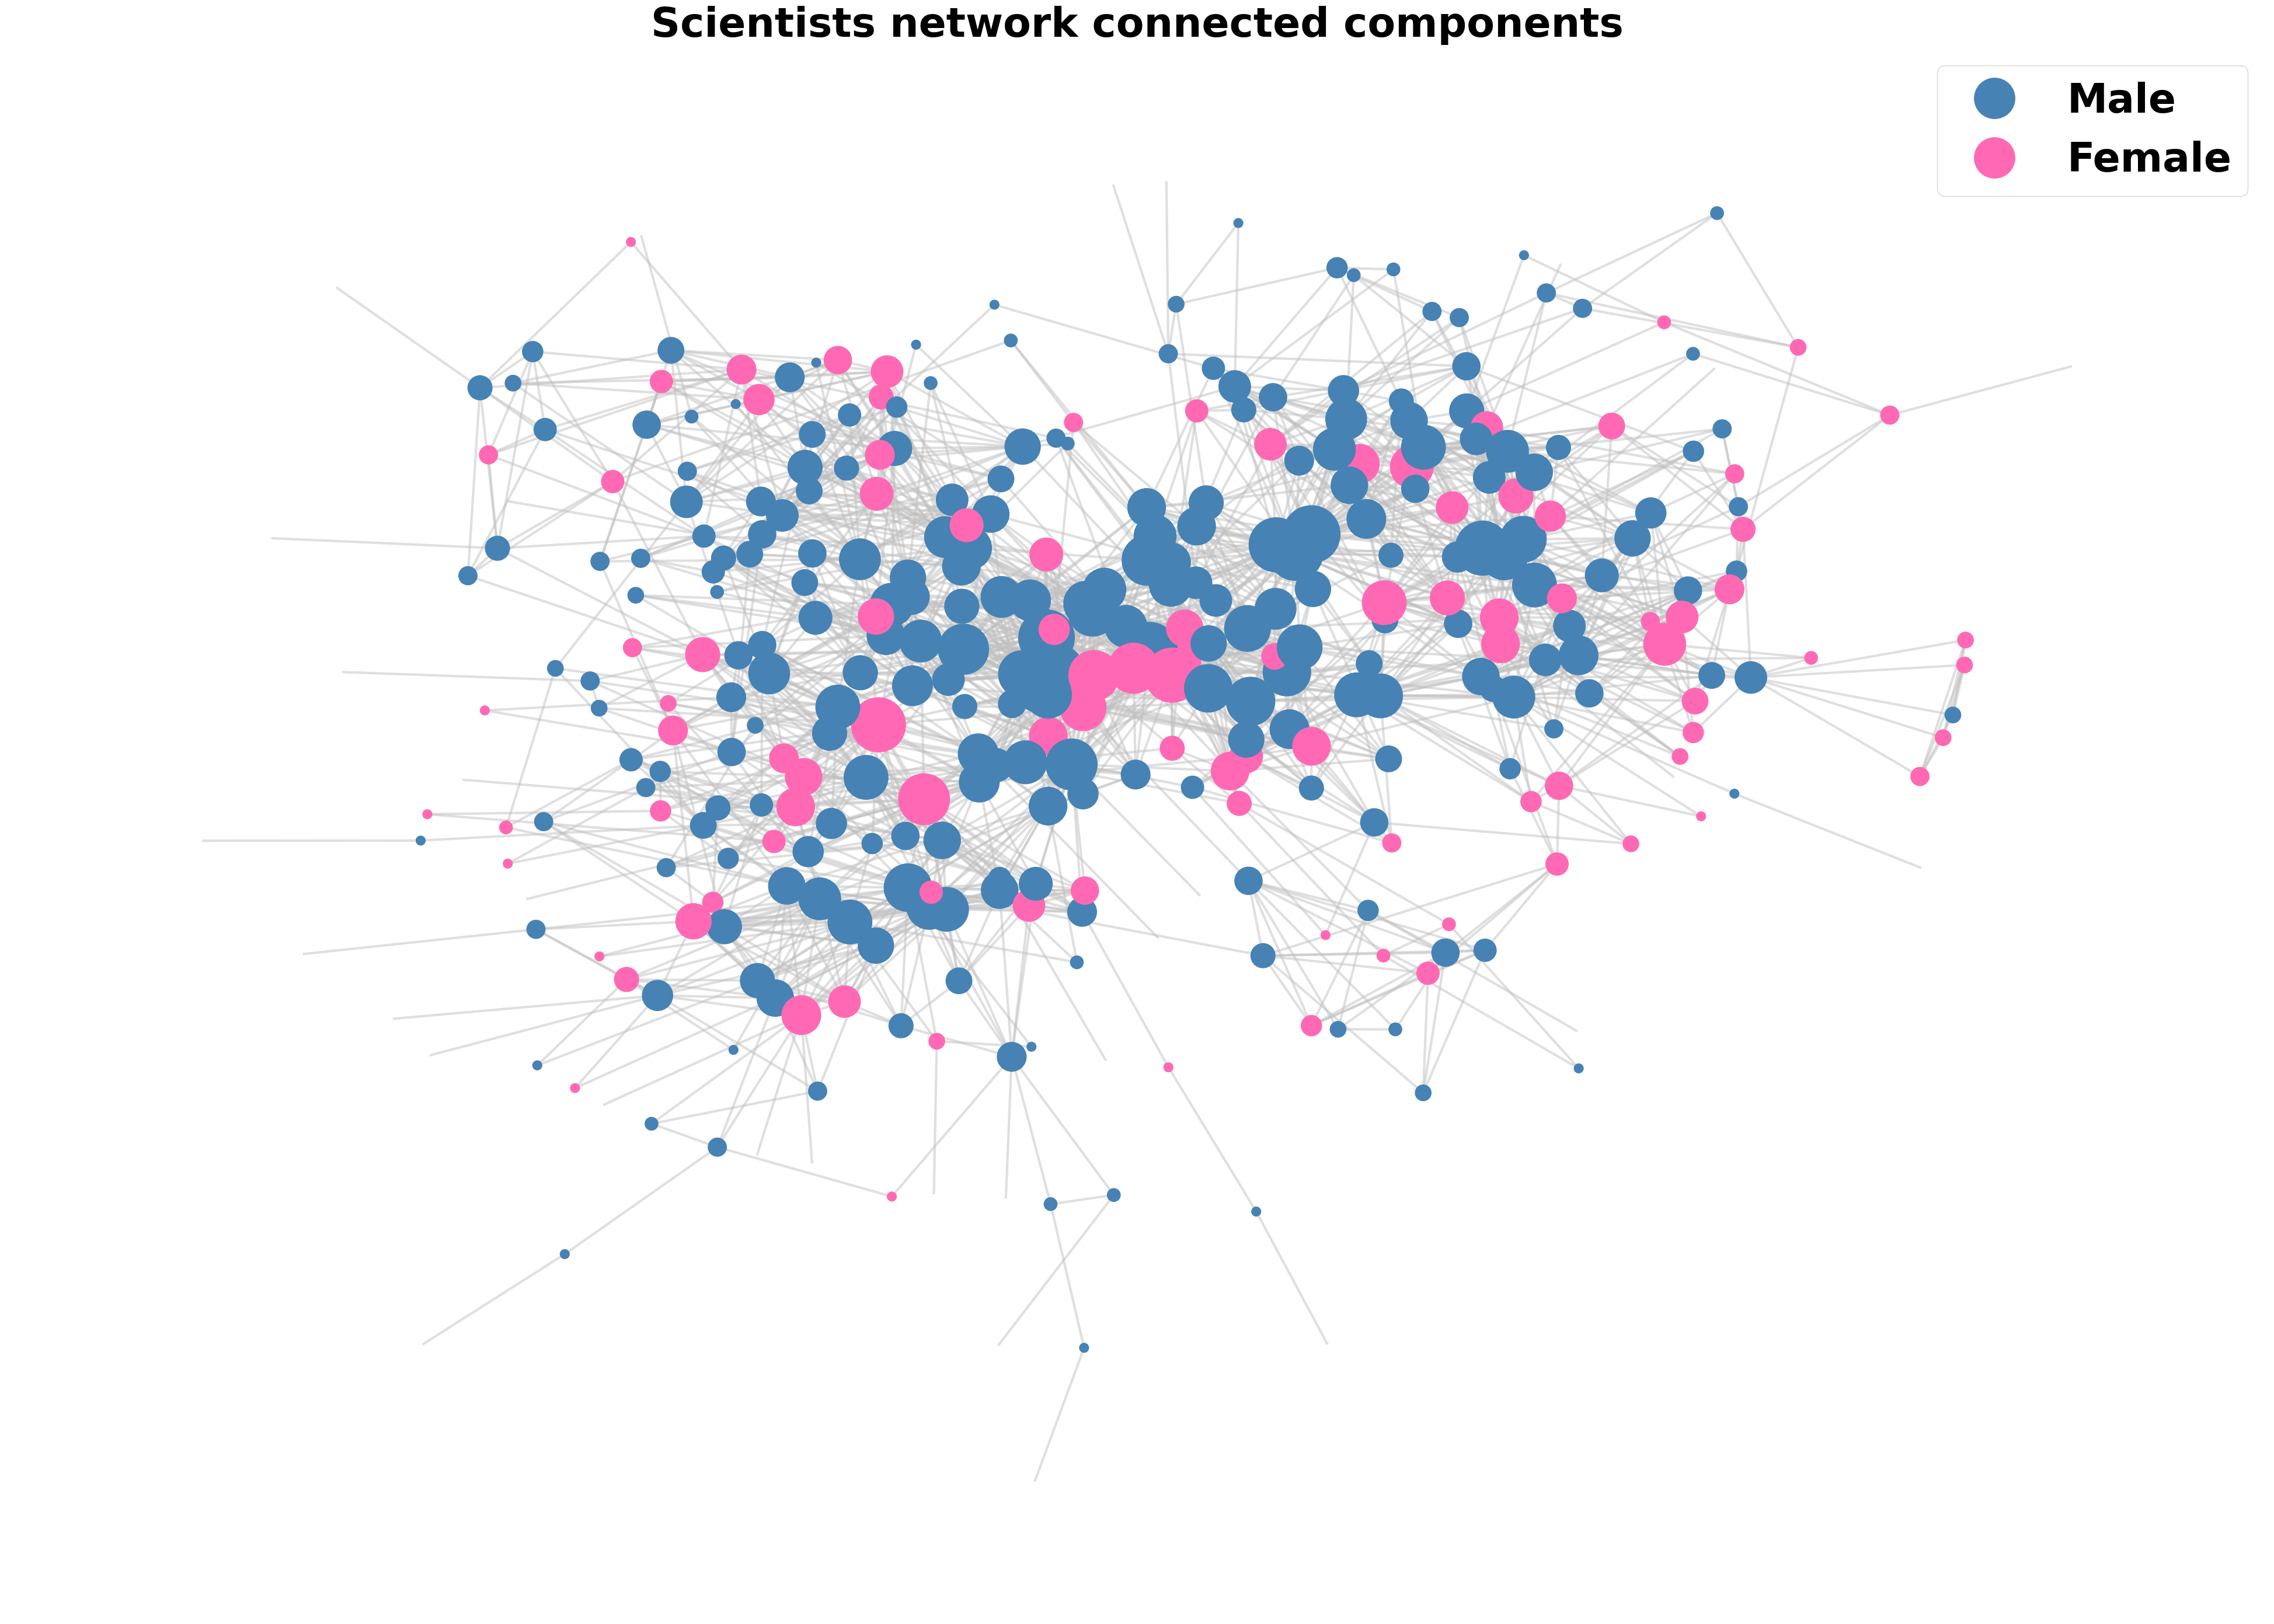

In [14]:
# Run 2 times for better view
# Choose layout
pos = nx.kamada_kawai_layout(J)

# Define the colors for each gender
gender_colors = {0: 'steelblue', 1: 'hotpink'}

# Define a node color mapping dictionary based on the 'gender' attribute
node_color_map = {str(node_id): gender_colors[attr['gender']] for node_id, attr in J.nodes(data=True)}

# Get the degree list 
degrees = [d for n,d in J.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)/(degree_max - degree_min)*5000 for d in degrees]

# Draw the nodes, sized to their degree 
nx.draw_networkx_nodes(J, pos, node_size=[v for v in degrees],
                       node_color=[node_color_map.get(str(n)) for n in J.nodes()])

# Draw the edges
nx.draw_networkx_edges(J, pos, edge_color='silver', width=3.0, alpha=0.5)

# Add legend
legend_handles = [plt.plot([], [], marker='o', markersize=50, color=color, ls="")[0] for gender, color in gender_colors.items()]
plt.legend(handles=legend_handles, labels=['Male', 'Female'], loc='upper right', fontsize=50)

plt.rcParams['figure.figsize'] = [50, 35]

# Set the axis to be off
plt.axis('off')
plt.title('Scientists network connected components', fontsize=50)
plt.show()

#plt.savefig('figures/scientists_network_connected.svg',format='svg')

<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>1.7.3. Comparison with Erdős-Rényi random network, with exponential distribution</b></p>

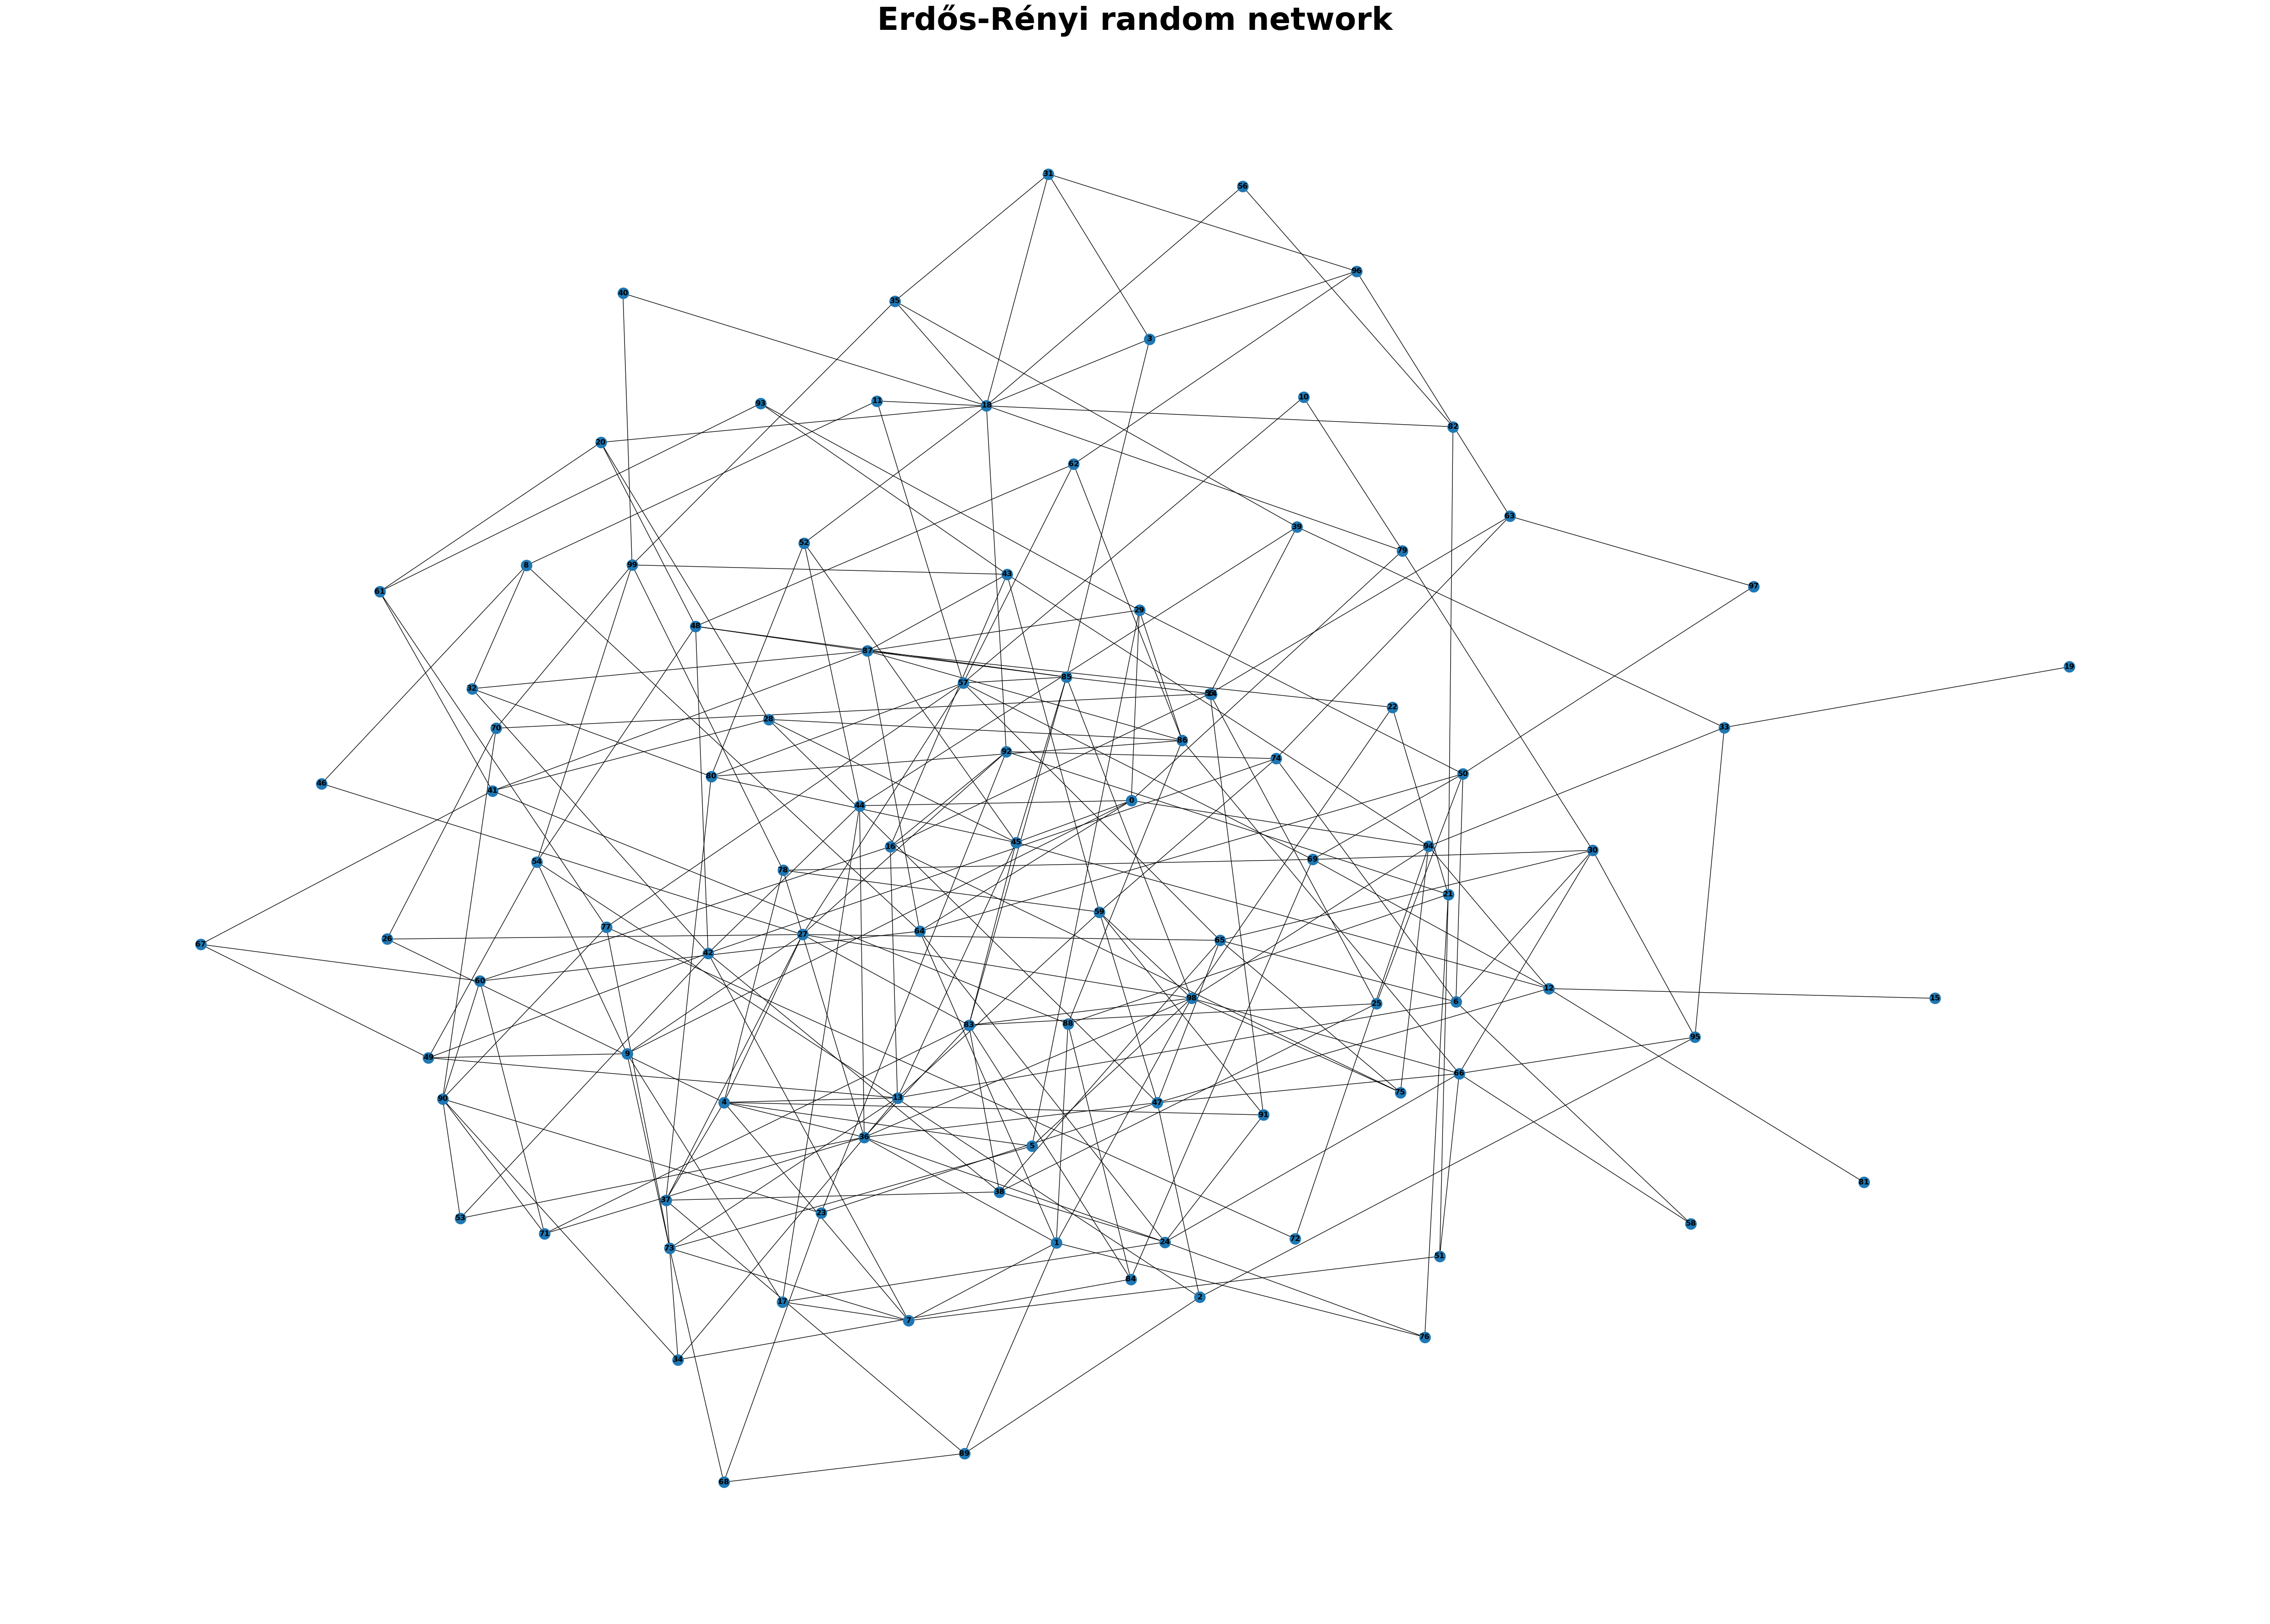

In [12]:
# Set the number of nodes and the edge probability
n = 100

# Create the Erdős-Rényi random network
ER = nx.erdos_renyi_graph(n, p=0.05)

# Calculate the degree sequence using the exponential distribution
degree_sequence = np.random.exponential(scale=0.5, size=n)
degree_sequence = np.round(degree_sequence).astype(int)

# Assign the degree sequence to the nodes in the graph
for i, (node, degree) in enumerate(zip(ER.nodes(), degree_sequence)):
    ER.nodes[node]['degree'] = degree

# Draw the graph
pos = nx.kamada_kawai_layout(ER)
nx.draw(ER, pos=pos, with_labels=True)
plt.title('Erdős-Rényi random network', fontsize=50)
plt.show()
#plt.savefig('figures/erdos_renyi.svg',format='svg')